# Project 3

**Group:** Andy Guan (265559) & Parsa Moniri (272030)

## Topic 2, Task 1

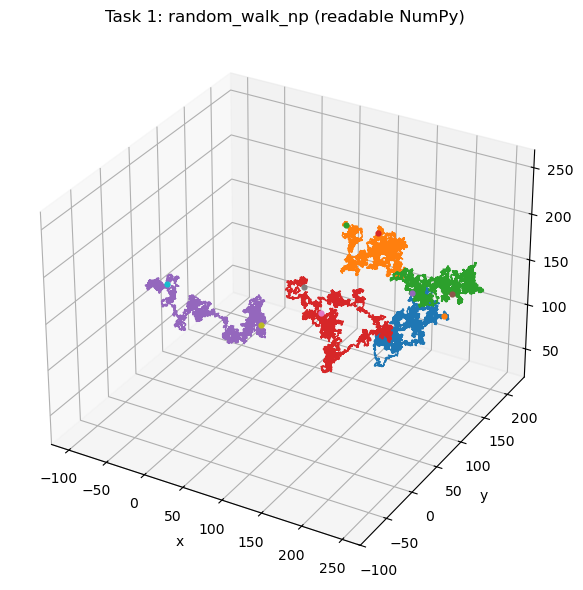

(array([[154.79120971, 195.12447033,  74.15960485],
        [ 87.77568795, 152.2279404 , 185.35299777],
        [171.71958398, 157.21286106, 128.77302402],
        [139.47360581,  25.62272654, 164.55232265],
        [ 18.83546958,  90.07718758,  88.68283977]]),
 array([[[154.79120971, 195.12447033,  74.15960485],
         [154.24568715, 195.2336399 ,  73.28723936],
         [154.9009495 , 195.4969687 ,  73.80341484],
         ...,
         [180.13381695, 210.2205883 ,  79.35496198],
         [180.82623188, 210.7178094 ,  79.29657557],
         [181.51619066, 209.91944709,  79.45877358]],
 
        [[ 87.77568795, 152.2279404 , 185.35299777],
         [ 87.98595388, 151.71998263, 184.45224042],
         [ 88.05635181, 151.74733672, 184.75946394],
         ...,
         [110.01099857, 183.6852506 , 167.44272334],
         [110.4836282 , 183.23532028, 167.81656165],
         [110.64071204, 182.73499538, 168.18789655]],
 
        [[171.71958398, 157.21286106, 128.77302402],
         [171.4

In [31]:
from main import random_walk_np
random_walk_np()  # uses defaults; pass args if you want

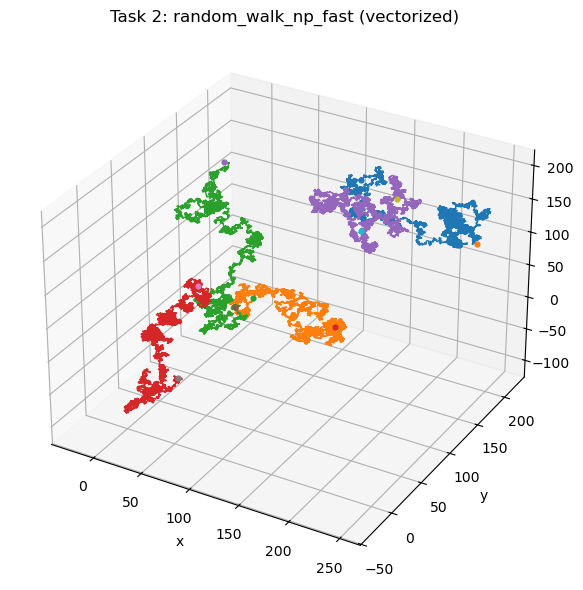

(array([[127.39233746, 182.55111546, 163.17071082],
        [ 53.95734275, 121.32715515,   0.54770003],
        [  8.19470479, 145.8993122 , 171.48085532],
        [  3.30552711, 108.72499829,   6.71711506],
        [162.65404784, 187.01448476, 145.93108929]]),
 array([[[127.39233746, 182.55111546, 163.17071082],
         [126.74364871, 183.2774733 , 163.25363326],
         [126.34307249, 183.12284774, 162.31027261],
         ...,
         [240.29361646, 193.28946399, 104.96265543],
         [240.88410196, 192.56273019, 105.17223905],
         [240.60029405, 192.48356522, 105.19389963]],
 
        [[ 53.95734275, 121.32715515,   0.54770003],
         [ 54.05993065, 120.51051502,  -0.32407219],
         [ 54.83977095, 121.22446485,  -0.51455743],
         ...,
         [ 98.47156554, 186.98081151, -82.77827494],
         [ 98.15374978, 187.82013555, -82.04809402],
         [ 99.00577689, 188.32134779, -81.8134988 ]],
 
        [[  8.19470479, 145.8993122 , 171.48085532],
         [  8.5

In [32]:
from main import random_walk_np_fast
random_walk_np_fast()  # fully vectorized